# Kaggle data visualization

Import libraries for using Dataframes and plotting

In [119]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Read the dataset into memory, the data is about used cars general information from Japan

In [120]:
data = pd.read_csv('./assets/final_cars_datasets.csv')
data.head()

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


Remove unnecessary columns from the dataset

In [121]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


Print a brief description of the dataset

In [122]:
data.describe(include="all")

,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318,2318,2318.000000,2318.000000,2318.000000,2318,2318,2318,2318
unique,NaN,28,258,NaN,NaN,NaN,3,3,3,5
top,NaN,toyota,fit,NaN,NaN,NaN,at,2wd,rhd,gasoline
freq,NaN,1047,270,NaN,NaN,NaN,2171,2121,2301,2290
mean,971.522433,NaN,NaN,2005.972390,100013.194996,1507.010785,NaN,NaN,NaN,NaN
std,288.673112,NaN,NaN,3.698863,52512.478883,549.585170,NaN,NaN,NaN,NaN
min,80.000000,NaN,NaN,1979.000000,2000.000000,9.000000,NaN,NaN,NaN,NaN
25%,776.000000,NaN,NaN,2004.000000,67000.000000,1300.000000,NaN,NaN,NaN,NaN
50%,1000.000000,NaN,NaN,2006.000000,94000.000000,1490.000000,NaN,NaN,NaN,NaN
75%,1213.000000,NaN,NaN,2009.000000,124000.000000,1800.000000,NaN,NaN,NaN,NaN


## Pairplot

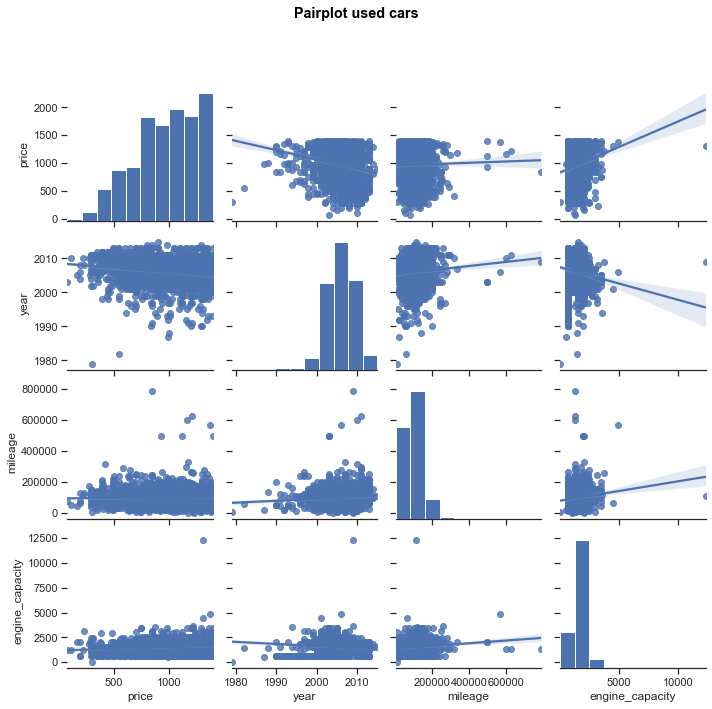

In [123]:
sns.set_style('ticks')
g = sns.pairplot(data, palette='magma',kind='reg', diag_kind='auto',dropna=True)
g.fig.suptitle('Pairplot used cars',fontweight ="bold", color="black", size="x-large")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.87) # Reduce plot to make room 
sns.despine(left=True)

## Violinplots in a subplot grid

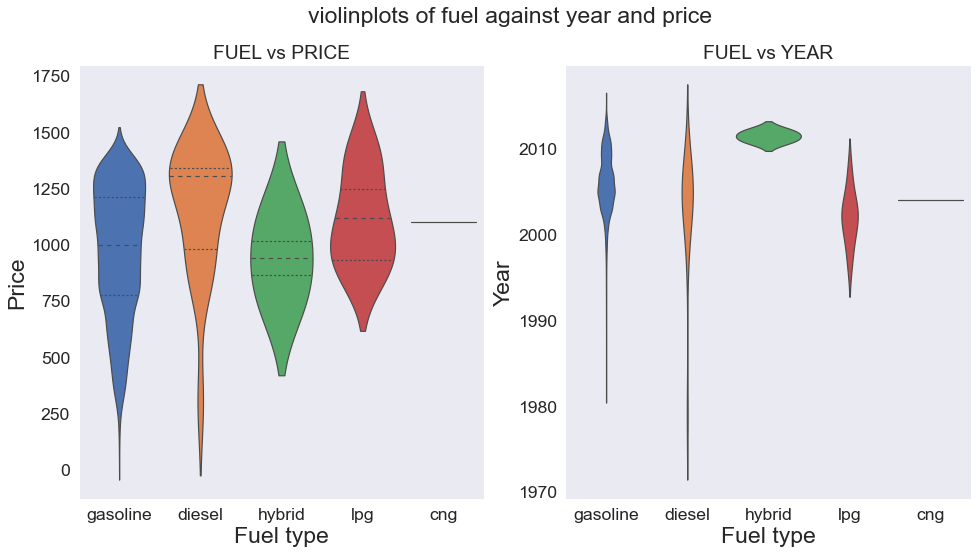

In [124]:
sns.set() #set seaborn as default
sns.set_style("dark") 
sns.color_palette("magma")
sns.set_context("paper", font_scale=2) 

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True ,figsize=(16,8)) #subplotting 1 row 2 columns
fig.suptitle('violinplots of fuel against year and price')

sns.violinplot(x=data.fuel, y=data.price, scale="area", inner='quartile',ax=axes[0], saturation=10)
axes[0].set_title('FUEL vs PRICE')
axes[0].set_xlabel('Fuel type', fontsize="large")
axes[0].set_ylabel('Price', fontsize="large")


sns.violinplot(x=data.fuel, y=data.year, scale="area", inner=None, ax=axes[1], saturation=10)
axes[1].set_title('FUEL vs YEAR')
axes[1].set_xlabel('Fuel type', fontsize="large")
axes[1].set_ylabel('Year', fontsize="large")
plt.show()

## Pie chart of the top ten automakers

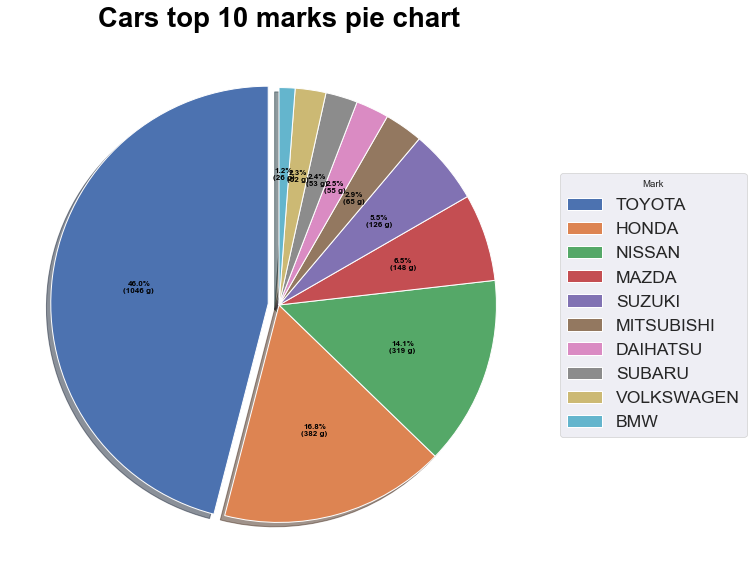

In [125]:
# Pie chart
pie_data = data.groupby('mark')['mark'].count()
pie_data = pie_data.sort_values(ascending = False).head(10)
labels = pie_data.index.to_list()
labels = list(map(str.upper, labels))
sizes = pie_data.values
explode = (0.05, 0, 0, 0, 0 , 0, 0, 0, 0, 0)

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(sizes,  
                                  autopct = lambda pct: func(pct, sizes), 
                                  explode = explode,  
                                  shadow = True,
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black", fontweight="bold")) 
  
# Adding legend 
ax.legend(wedges, labels, 
          title ="Mark", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Cars top 10 marks pie chart", fontweight ="bold", color="black", size="x-large")
fig.set_facecolor('white')
  
# show plot 
plt.show() 

## Catplot of fuel type vs price and drivetrain, subplotted by transmission type

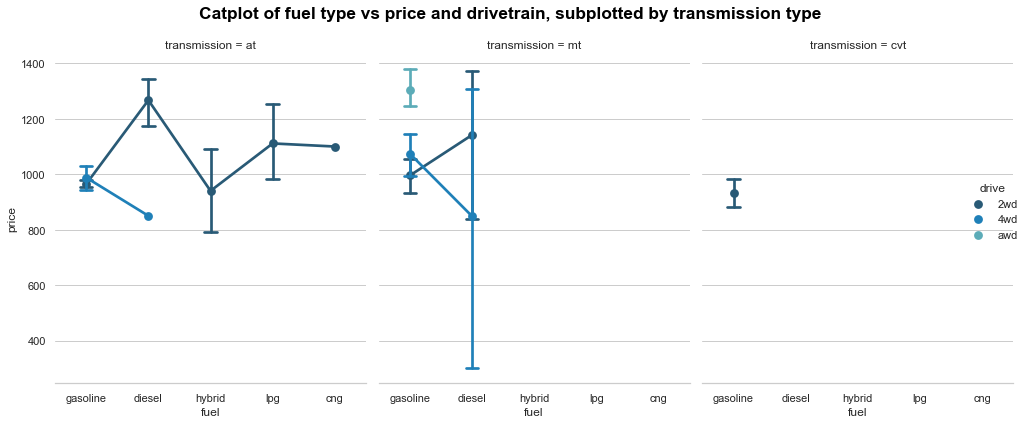

In [126]:
sns.set(style="whitegrid")
g = sns.catplot(x="fuel", y="price", hue="drive", col="transmission", capsize=.2, palette="YlGnBu_d", height=6, aspect=.75, kind="point", data=data)
# Tweak the visual presentation
g.fig.suptitle("Catplot of fuel type vs price and drivetrain, subplotted by transmission type", fontweight ="bold", color="black", size="x-large")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.87) # Reduce plot to make room 
sns.despine(left=True)

## Boxplot and distribution of cars mileage by fuel type

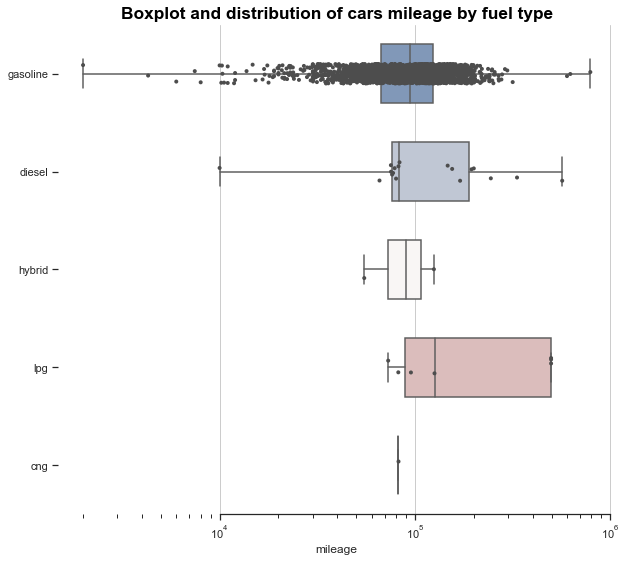

In [127]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 9))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="mileage", y="fuel", data=data,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="mileage", y="fuel", data=data,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_title("Boxplot and distribution of cars mileage by fuel type", fontweight ="bold", color="black", size="x-large")
sns.despine(trim=True, left=True)